**PROBLEM STATEMENT**

There is a need within the apple industry to be able to accurately predict how to set the price per kilogram of golden delicious apples.

**INTRODUCTION/CONTEXT**

The apple industry, like many other fresh produce sectors, faces a delicate balance bewteen supply and demand and how to set their prices accordingly. If prices are set too low, profit will fall, whilst if prices are set to high, then there is the risk of apple sales not being high enough. The knock on effect of poor sales is that a large volume of stock goes to waste.

We have access to dataset containing multiple numerical and categorical features. Using these variables, we are going to train a supervised regression model which will aim to accurately predict the price of golden delicious apples per kilogram, given a set of features.

**SUPERVISED LEARNING AS A** **PROBLEM** **SOLVING** **TOOL**

We will be building a regression model, through supervised learning, in order to accurately predict the recommended average price per kilogram of golden declious apples in the coming years. The average price/ target variable will be shifted depending on the value(s) of a select number of numerical and categorical features.

While no model can accurately preidct every outcome with on hundred percent certainty, a well trained and a well evaluated model can provide appropriate estimations of the target variable. 

**INTERPLAY BETWEEN HUMAN EXPERTISE AND REGRESSION MODEL**

No regression model, no matter how complex or accurate, should serve as the absolute decision maker when deciding on business strategy. Well trained machine learning models can definitely provide valuable insights into the interactions of key variables but they cannot replace industry expertise.

For example, the regression model below may give insight into how a categorical variable may affect the average price of apples but experienced farmers, retailers and distributors in the apple industry receive this information and choose to not implement the recommended price shifting due to their own expertise in the field. 

Furthermore, apple farmers could be consulted in order to identify more potential dependent variables that could potentially play a key role in affecting the target variable. This would also involve having access to the right, clean and pre-processed data.

**PACKAGES**

IMPORTING PACKAGES FOR EXPLORATORY DATA ANALYSIS

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
import missingno
from scipy import stats
import math
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

MORE PACKAGES WILL BE IMPORTED FOR THE REGRESSION MODEL(S)

**DATA** **IMPORTATION**

In [3]:
df_train = pd.read_csv('Downloads/df-train_set.csv')
df_test = pd.read_csv('Downloads/df-test_set.csv')

Before analysing the data, it is imperative to examine the dataset for any notable anomalies. 
We begin by assesing the shape (number of rows and columns) of the dataframe, as well as data type of each column. It is also useful to call the .head() on the dataframe in order to glance at the first five rows.

In [4]:
df_train.shape

(64376, 13)

In [5]:
df_test.shape

(685, 13)

The training dataframe contains **64376** rows and **13** columns. One of these columns is the target variable - average price of a kilogram of apples - and thus there are **12** feature variables. The test data contains **685** rows and **13** columns

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Here we can see that we contain both numerical and categorical feature variables. Numerical and feature variables will get subjected to different Exploratory Data Analysis techniques.

The categorical feature columns are 

```
Province, Container, Size_Grade and Commodities.

```
Meanwhile, the numerical feature columns are 

```
Weight_Kg, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand, avg_price_per_kg, 
```
Furthermore, the column 

```
Date
```
can be a useful feature in order to track the interplay of other features interacting over time.






In [7]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [8]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


Lastly, we want to check as to whether there is any missing/null data entries


In [9]:
df_train.isnull().sum() # allows us to view the number of missing data values per column()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [10]:
df_test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

From the test set we can see that the Commodities only contain the APPLE GOLDEN DELICIOUS. Therefore we can subset the training data to follow the same suit.

In [11]:
golden_apple_train = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS']
golden_apple_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [12]:
#Getting the months and quarters for the dates
golden_apple_train.date = pd.to_datetime(golden_apple_train.Date)
golden_apple_train["Quarter"] = golden_apple_train.date.dt.quarter
golden_apple_train["Month"] = golden_apple_train.date.dt.month
golden_apple_train["Year_Month"] = golden_apple_train.date.dt.year

golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


In [13]:
golden_apple_train = golden_apple_train.drop('Date', axis=1)
golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


**TARGET** **VARIABLE** **IDENTIFICATION**

The target variable is the average price of the golden delicious apples.

**EXPLORATORY DATA ANALYSIS**


Exploratory Data Analysis (EDA) is a vitally important step in the Data Science Process. EDA consists of comprehensively examining the dataset before using the the dataset in training a model. The core of EDA involves identifying key relationships that exist between featires in the dataset and how these features interact to alter the target variable.
EDA includes performing univariate and multivariate analysis using a myriad of statistical and data visualisating techniques.




**UNIVARIATE ANALYSIS**

Univariate EDA entails assesing each variable individually (both in a graphical and non-graphical sense). Non-graphically univariate EDA methods include exploring the spread of the numerical features.

By calling 

```
df.describe()

```
we are given a comprehensive breakdown of several key summary statistics of each numerical feature.



In [14]:
golden_apple_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,2.239754,5.609119,2019.968238
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,0.908357,2.687248,0.175412
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,1.000000,1.000000,2019.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,1.000000,3.000000,2020.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,2.000000,6.000000,2020.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,3.000000,7.000000,2020.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,4.000000,12.000000,2020.000000


In [15]:
golden_apple_train.quantile(0.85)

Weight_Kg              18.30
Low_Price             160.00
High_Price            180.00
Sales_Total         37320.00
Total_Qty_Sold        339.70
Total_Kg_Sold        5380.20
Stock_On_Hand         793.35
avg_price_per_kg        9.15
Quarter                 3.00
Month                   8.00
Year_Month           2020.00
Name: 0.85, dtype: float64

The 25%, 50% and 75% metrics relate to the 25th, median and 75th percentiles respectively. It is important to not directly compare the means ( and other summary metrics) between different variables. At least not performing any standardisation first. 

Additionally, there are two further metrics that can be calculated. 

```
df.skew()
```
allows one to assess whether a numerical feature is skewed either to the left or right (i.e not normally distributed/symetrical about the median). Whilst

```
df.curtosis()
```
allows one to evaluate whether or not there is a high prevelance of outliers present in each of the numerical features.




In [16]:
golden_apple_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
Quarter            -0.112794
Month               0.078651
Year_Month         -5.344208
dtype: float64

Here we can see that each numerical feature has a skew value of greater than 1. Thus each variable can be deemed to be significantly postively skewed to the right.

In [17]:
golden_apple_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
Quarter             -1.175297
Month               -0.620111
Year_Month          26.587803
dtype: float64

Based on the resulting kurtosis and skewness values, we can safely assume that there is a high prevelance of outliers which are higher than the means of each numerical feature.

Further analysis of the features is recommended in a graphical form.

Creating a list of the columns names of all the numerical features can easily be achieved:


In [18]:
num_features = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg']

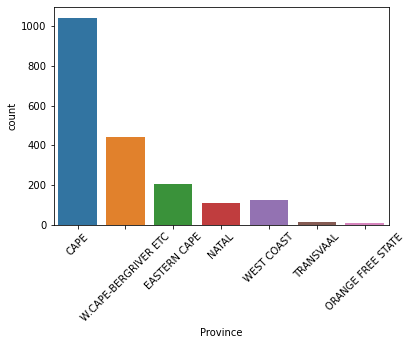

In [30]:
sns.countplot(x='Province', data=golden_apple_train)
plt.xticks(rotation=45)
plt.show()

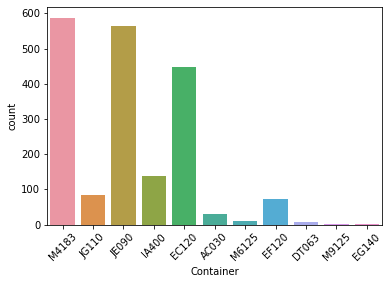

In [27]:
sns.countplot(x='Container', data=golden_apple_train)
plt.xticks(rotation=45)
plt.show()

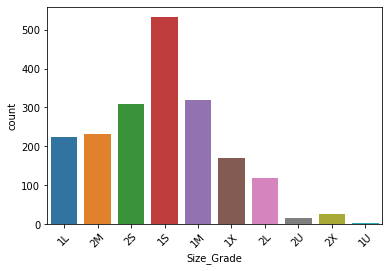

In [28]:
sns.countplot(x='Size_Grade', data=golden_apple_train)
plt.xticks(rotation=45)
plt.show()

**MULTIVARIATE ANALYSIS**

Multivariate EDA entails exploring and assessing any potential relationships between features. 

Non-graphical multivariate analysis involves finding the correlation coefficients between all relevant numerical features.

The Pearson's correlation coeffiecient is a common correlation metric used to make an inital assessment of the relationship between two numerical variables in a dataset.

In [18]:
golden_apple_train.corr()


,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.042958
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,0.024559
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.039385
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.040985
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.037732
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,-0.005622
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,-0.027354
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.022305
Quarter,0.042958,0.024559,0.039385,-0.040985,-0.037732,-0.005622,-0.027354,-0.022305,1.000000


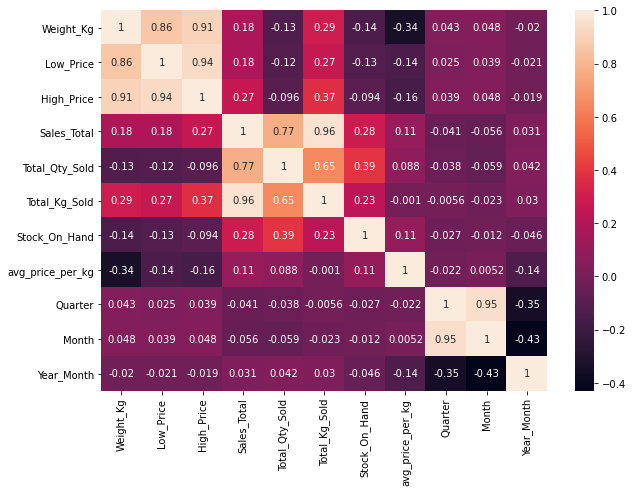

In [24]:
plt.subplots(figsize=(10,7))
sns.heatmap(golden_apple_train.corr(), annot=True)
plt.show()

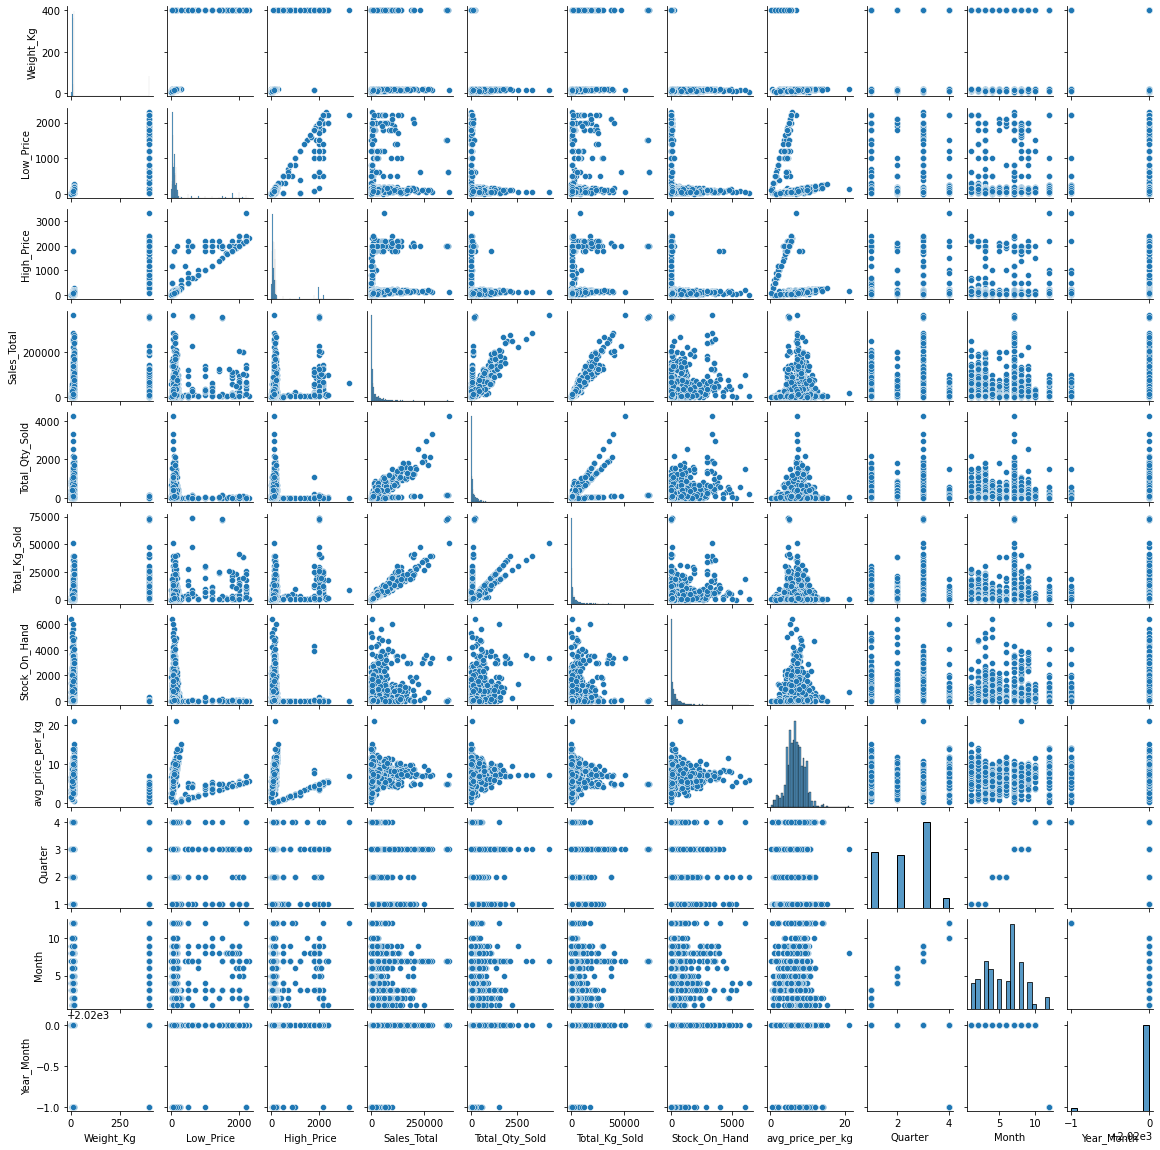

In [57]:
g = sns.pairplot(golden_apple_train)
g.fig.set_size_inches(16,16)
plt.show()

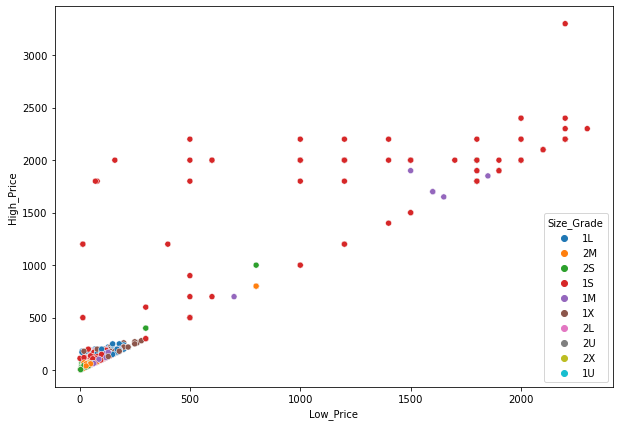

In [31]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='Low_Price', y='High_Price', hue='Size_Grade', data=golden_apple_train)
plt.show()

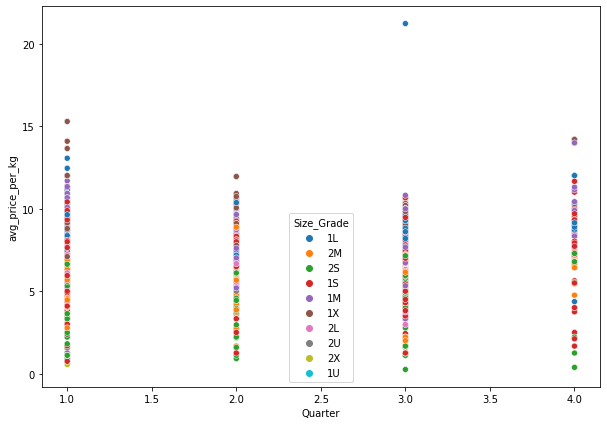

In [32]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='Quarter', y='avg_price_per_kg', hue='Size_Grade', data=golden_apple_train)
plt.show()

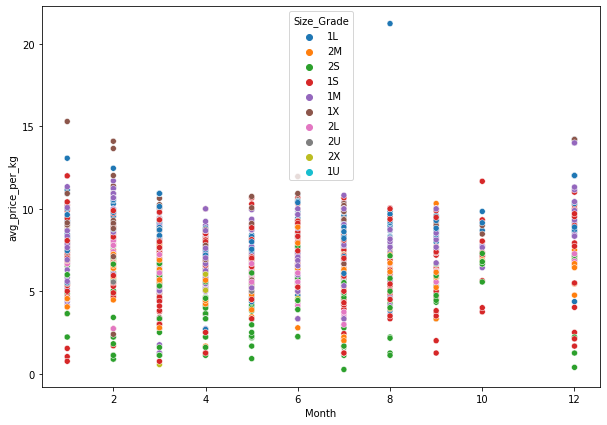

In [33]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='Month', y='avg_price_per_kg', hue='Size_Grade', data=golden_apple_train)
plt.show()

**INSIGHT ON THE EDA**

**DATA CLEANING/DEALING WITH OUTLIERS**

**FEATURE SELECTION AND ENGINEERING**

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

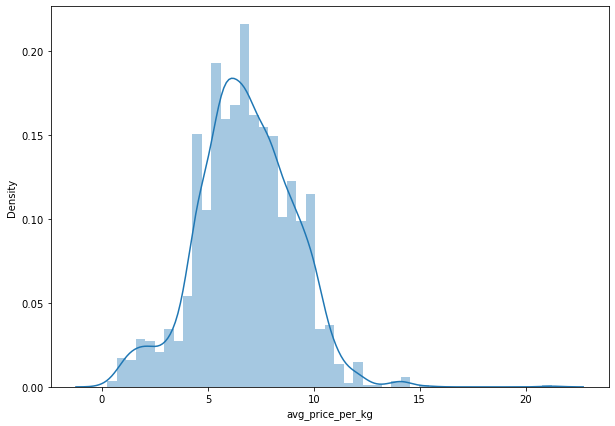

In [34]:
plt.subplots(figsize=(10,7))
sns.distplot(golden_apple_train['avg_price_per_kg'],kde=True)

### Dummy Variable Encoding

In [45]:
dummy_df = pd.get_dummies(golden_apple_train)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Commodities_APPLE GOLDEN DELICIOUS
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,...,0,0,0,0,0,0,0,0,0,1
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,...,0,0,0,0,0,1,0,0,0,1
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,...,0,0,0,0,0,0,1,0,0,1
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,...,0,1,0,0,0,0,0,0,0,1
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,...,0,1,0,0,0,0,0,0,0,1


### Correlation and Variable Selection

Using the dummy variable dataframe, we can build a model that predicts Average Price per KG (our dependent variable) as a function of 40 different independent variables (IVs)

Before we do this, however, let's reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [19]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

In [20]:
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Size_Grade_1L,0.280966
Province_W.CAPE-BERGRIVER ETC,0.262051
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Sales_Total,0.108473
Stock_On_Hand,0.105028


However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation. Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [21]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
#corr = X_data.corr()
r, c = np.where(np.abs(corrs) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corrs.iloc[r[off_diagonal], c[off_diagonal]]

""


It seems we do not have any autocorrelate features. We will now build a few models using our features to see which perform best. The models we will build will be trained on

the feature with the highest correlation with our target - OverallQual
the feature with the second highest correlation - GrLivArea
features with a correlation > 6 - 1stFlrSF, TotalBsmtSF, GarageArea, GarageCars, GrLivArea, OverallQual
all the features in our dummy_df

In [22]:
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Commodities_APPLE GOLDEN DELICIOUS,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,3,9,2020,...,0,0,0,0,0,0,0,0,1,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,2,4,2020,...,0,0,0,0,1,0,0,0,1,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,2,4,2020,...,0,0,0,0,0,1,0,0,1,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,2,5,2020,...,1,0,0,0,0,0,0,0,1,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,3,9,2020,...,1,0,0,0,0,0,0,0,1,4.50


**MODEL INSTANTIATION**

**MODEL TRAINING**

In [59]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))


def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    train_mse = mse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    test_mse = mse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2, 'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [60]:
# Our model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = golden_apple_train['avg_price_per_kg']
y.shape

(1952,)

In [61]:
# fit the model to the data and make predictions - Weight_Kg
X = golden_apple_train['Weight_Kg'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.141562200474744,
 'Train R^2': 0.11028193098883021,
 'Test RMSE': 2.0112189625232535,
 'Test R^2': 0.12825310685500813}

In [62]:
# fit the model to the data and make predictions - all features
X = dummy_df.drop('avg_price_per_kg',axis=1).values
y = dummy_df['avg_price_per_kg']

fit_and_evaluate(model,X,y)

{'Train RMSE': 1.3684656753858473,
 'Train R^2': 0.6367054837646151,
 'Test RMSE': 1.4046303707917969,
 'Test R^2': 0.5747975022050058}

Root Mean squared error is higher on the test set than the train set and R-squared is lower on the test set

**MODEL TESTING**

**MODEL PREDICTION**

**MODEL PERFORMANCE EVALUATION**

**FINAL COMMENTS**